In [2736]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

import math
from sklearn.metrics import r2_score, mean_squared_error

import os

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

from sklearn.model_selection import KFold




In [2737]:
# Lecture CSV
cars_data = pd.read_csv('../data/voiture.csv')

In [2738]:
print(len(cars_data))


11914


In [2739]:
cars_data.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [2740]:
# Data cleaning

cars_data.columns = cars_data.columns.str.lower().str.replace(" ", "_")
cars_data.rename(columns = {'engine_fuel_type' : 'fuel_type', 'engine_hp' : 'hp', 'engine_cylinders' : 'cylinders', 'transmission_type' : 'transmission', 'driven_wheels' : 'drive', 'number_of_doors' : 'doors', 'market_category' : 'market', 'vehicle_size' : 'size', 'vehicle_style' : 'style', 'msrp' : 'price'}, inplace = True)

# mettre en minuscule tout les strings dans les colonnes

cars_data['fuel_type'] = cars_data['fuel_type'].str.lower()
cars_data['transmission'] = cars_data['transmission'].str.lower()
cars_data['drive'] = cars_data['drive'].str.lower()
cars_data['market'] = cars_data['market'].str.lower()
cars_data['size'] = cars_data['size'].str.lower()
cars_data['style'] = cars_data['style'].str.lower()
cars_data['make'] = cars_data['make'].str.lower()
cars_data['model'] = cars_data['model'].str.lower()

# pas d'accents dans les colonnes

cars_data['make'] = cars_data['make'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
cars_data['model'] = cars_data['model'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
cars_data['fuel_type'] = cars_data['fuel_type'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
cars_data['transmission'] = cars_data['transmission'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
cars_data['drive'] = cars_data['drive'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
cars_data['market'] = cars_data['market'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
cars_data['size'] = cars_data['size'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
cars_data['style'] = cars_data['style'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [2741]:
cars_data.head()


,make,model,year,fuel_type,hp,cylinders,transmission,drive,doors,market,size,style,highway_mpg,city_mpg,popularity,price
0,bmw,1 series m,2011,premium unleaded (required),335.0,6.0,manual,rear wheel drive,2.0,"factory tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1 series,2011,premium unleaded (required),300.0,6.0,manual,rear wheel drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1 series,2011,premium unleaded (required),300.0,6.0,manual,rear wheel drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1 series,2011,premium unleaded (required),230.0,6.0,manual,rear wheel drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1 series,2011,premium unleaded (required),230.0,6.0,manual,rear wheel drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [2742]:
print('Number of duplicates are : ', cars_data.duplicated().sum())
# exemple de doublon
print(cars_data[cars_data.duplicated(keep=False)].head(10))
# nombre de doublon 

print('Nb avant suppression de doublon : ', len(cars_data))
cars_data = cars_data.drop_duplicates()

print('Nb après suppression de doublon : ', len(cars_data))

Number of duplicates are :  715
      make     model  year                    fuel_type     hp  cylinders  \
11     bmw  1 series  2013  premium unleaded (required)  230.0        6.0   
14     bmw  1 series  2013  premium unleaded (required)  230.0        6.0   
17    audi       100  1992             regular unleaded  172.0        6.0   
18    audi       100  1992             regular unleaded  172.0        6.0   
20    audi       100  1992             regular unleaded  172.0        6.0   
22    audi       100  1993             regular unleaded  172.0        6.0   
24    audi       100  1993             regular unleaded  172.0        6.0   
25    audi       100  1993             regular unleaded  172.0        6.0   
87  nissan     200sx  1996             regular unleaded  115.0        4.0   
88  nissan     200sx  1996             regular unleaded  115.0        4.0   

   transmission              drive  doors              market     size  style  \
11       manual   rear wheel drive    2

In [2743]:
print('Number of missing values in each columns are below : ')
print(cars_data.isnull().sum())

Number of missing values in each columns are below : 
make               0
model              0
year               0
fuel_type          3
hp                69
cylinders         30
transmission       0
drive              0
doors              6
market          3376
size               0
style              0
highway_mpg        0
city_mpg           0
popularity         0
price              0
dtype: int64


In [2744]:
cars_data.drop('market', axis = 1, inplace = True)

cars_data.drop('popularity', axis = 1, inplace = True)



In [2745]:
null_values = cars_data[cars_data.isnull().any(axis = 1)]
null_values


,make,model,year,fuel_type,hp,cylinders,transmission,drive,doors,size,style,highway_mpg,city_mpg,price
539,fiat,500e,2015,electric,NaN,0.0,direct_drive,front wheel drive,2.0,compact,2dr hatchback,108,122,31800
540,fiat,500e,2016,electric,NaN,0.0,direct_drive,front wheel drive,2.0,compact,2dr hatchback,103,121,31800
541,fiat,500e,2017,electric,NaN,0.0,direct_drive,front wheel drive,2.0,compact,2dr hatchback,103,121,31800
1983,chevrolet,bolt ev,2017,electric,200.0,NaN,direct_drive,front wheel drive,4.0,compact,4dr hatchback,110,128,40905
1984,chevrolet,bolt ev,2017,electric,200.0,NaN,direct_drive,front wheel drive,4.0,compact,4dr hatchback,110,128,36620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9853,kia,soul ev,2016,electric,NaN,0.0,direct_drive,front wheel drive,4.0,compact,wagon,92,120,31950
9854,kia,soul ev,2016,electric,NaN,0.0,direct_drive,front wheel drive,4.0,compact,wagon,92,120,35950
11321,suzuki,verona,2004,NaN,155.0,6.0,automatic,front wheel drive,4.0,midsize,sedan,25,17,17199
11322,suzuki,verona,2004,NaN,155.0,6.0,automatic,front wheel drive,4.0,midsize,sedan,25,17,20199


In [2746]:


cars_data['fuel_type'] = cars_data['fuel_type'].fillna('regular unleaded')

cars_data['hp'] = cars_data['hp'].fillna(cars_data['hp'].mean())

cars_data['cylinders'] = cars_data['cylinders'].fillna(0.0)

cars_data['doors'] = cars_data['doors'].fillna(cars_data['doors'].mean())

def simplify_fuel_type(fuel_type):
    """
    Regroupe les types de carburant en catégories simplifiées.
    """
    if fuel_type in ['premium unleaded (required)', 'premium unleaded (recommended)', 'regular unleaded']:
        return 'essence'
    elif fuel_type in ['flex-fuel (unleaded/e85)', 'flex-fuel (premium unleaded recommended/e85)', 
                       'flex-fuel (premium unleaded required/e85)', 'flex-fuel (unleaded/natural gas)']:
        return 'flex-fuel'
    elif fuel_type == 'diesel':
        return 'diesel'
    elif fuel_type == 'electric':
        return 'electrique'
    elif fuel_type == 'natural gas':
        return 'gaz naturel'
    else:
        return 'autre'

# Appliquer la fonction au cars_data_be
cars_data['fuel_type'] = cars_data['fuel_type'].apply(simplify_fuel_type)



In [2747]:
num_col = cars_data.select_dtypes(include = [np.number])
cat_col = cars_data.select_dtypes(exclude = [np.number])

In [2748]:
# Supression des voitures ayant unknown

cars_data.drop(cars_data[cars_data['transmission']=='UNKNOWN'].index, axis='index', inplace = True)

print(len(cars_data))
print('Number of missing values in each columns are below : ')
print(cars_data.isnull().sum())


11199
Number of missing values in each columns are below : 
make            0
model           0
year            0
fuel_type       0
hp              0
cylinders       0
transmission    0
drive           0
doors           0
size            0
style           0
highway_mpg     0
city_mpg        0
price           0
dtype: int64


In [2749]:
s1 = cars_data.shape
clean = cars_data[['hp', 'price']]
for i in clean.columns:
    qt1 = cars_data[i].quantile(0.25)
    qt3 = cars_data[i].quantile(0.75)
    iqr =  qt3 - qt1
    lower = qt1-(1.5*iqr)
    upper = qt3+(1.5*iqr)
    min_in = cars_data[cars_data[i]<lower].index
    max_in = cars_data[cars_data[i]>upper].index
    
    cars_data.drop(min_in, inplace = True)
    cars_data.drop(max_in, inplace = True)
s2 = cars_data.shape
outliers = s1[0] - s2[0]
print("Deleted outliers are : ", outliers)

Deleted outliers are :  1063


In [2750]:
# Nombre de ligne restante dans le cars_data_be après nettoyage

print(len(cars_data))

# affichage de tout les drives

print(cars_data['drive'].unique())

# affichage de tout les fuel types

print(cars_data['fuel_type'].unique())

# affichage de tout les transmission types

print(cars_data['transmission'].unique())

# affichage de tout les sizes

print(cars_data['size'].unique())

# affichage de tout les styles

print(cars_data['style'].unique())

# affichage de 5 premières lignes du cars_data_be
print(cars_data.head())

10136
['rear wheel drive' 'front wheel drive' 'all wheel drive'
 'four wheel drive']
['essence' 'flex-fuel' 'diesel' 'electrique' 'gaz naturel']
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
['compact' 'midsize' 'large']
['coupe' 'convertible' 'sedan' 'wagon' '4dr hatchback' '2dr hatchback'
 '4dr suv' 'passenger minivan' 'cargo minivan' 'crew cab pickup'
 'regular cab pickup' 'extended cab pickup' '2dr suv' 'cargo van'
 'convertible suv' 'passenger van']
  make       model  year fuel_type     hp  cylinders transmission  \
0  bmw  1 series m  2011   essence  335.0        6.0       manual   
1  bmw    1 series  2011   essence  300.0        6.0       manual   
2  bmw    1 series  2011   essence  300.0        6.0       manual   
3  bmw    1 series  2011   essence  230.0        6.0       manual   
4  bmw    1 series  2011   essence  230.0        6.0       manual   

              drive  doors     size        style  highway_mpg  city_mpg  price  
0  rear wheel drive    2

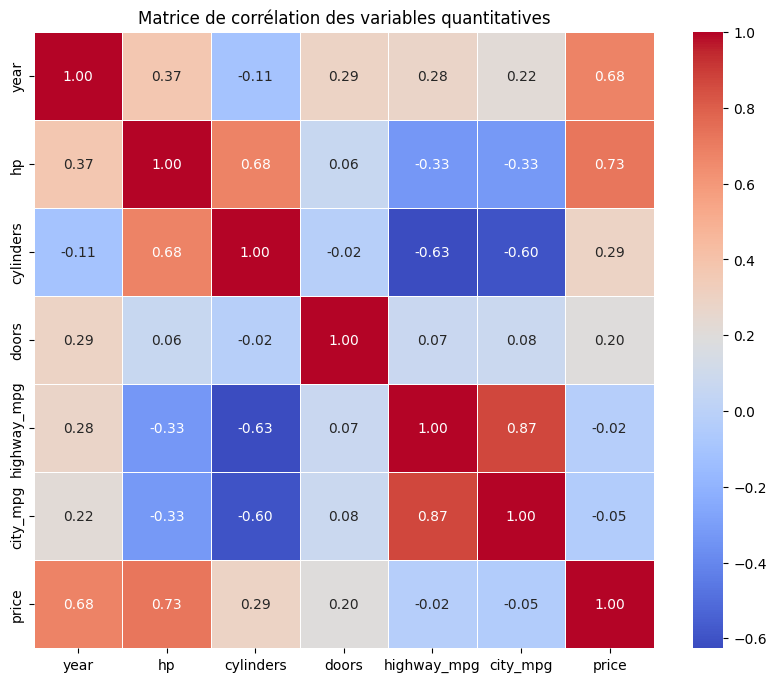

ANOVA for make: F-statistic = 93.63, p-value = 0.0000
ANOVA for model: F-statistic = 141.22, p-value = 0.0000
ANOVA for fuel_type: F-statistic = 60.93, p-value = 0.0000
ANOVA for transmission: F-statistic = 472.87, p-value = 0.0000
ANOVA for drive: F-statistic = 519.68, p-value = 0.0000
ANOVA for size: F-statistic = 714.61, p-value = 0.0000
ANOVA for style: F-statistic = 131.48, p-value = 0.0000
Chi-square test for make: Chi2 = 4823.63, p-value = 0.0000
Chi-square test for model: Chi2 = 19068.38, p-value = 0.0000
Chi-square test for fuel_type: Chi2 = 470.73, p-value = 0.0000
Chi-square test for transmission: Chi2 = 2244.80, p-value = 0.0000
Chi-square test for drive: Chi2 = 1818.56, p-value = 0.0000
Chi-square test for size: Chi2 = 1938.05, p-value = 0.0000
Chi-square test for style: Chi2 = 2419.78, p-value = 0.0000


In [2751]:
# Création d'une copie des données pour éviter de modifier l'original
data_copy = cars_data.copy()

# Sélection des colonnes quantitatives
quantitative_cols = ['year', 'hp', 'cylinders', 'doors', 'highway_mpg', 'city_mpg', 'price']

# Calcul de la matrice de corrélation
correlation_matrix = data_copy[quantitative_cols].corr(method='pearson')

# Affichage de la matrice de corrélation avec seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice de corrélation des variables quantitatives')
plt.show()

from scipy.stats import f_oneway

categorical_cols = ['make', 'model', 'fuel_type', 'transmission', 'drive', 'size', 'style']

for col in categorical_cols:
    if col in data_copy.columns:
        groups = [group['price'].values for name, group in data_copy.groupby(col)]
        f_stat, p_value = f_oneway(*groups)
        print(f"ANOVA for {col}: F-statistic = {f_stat:.2f}, p-value = {p_value:.4f}")

from scipy.stats import chi2_contingency

# Catégoriser la variable cible (par exemple, en quartiles)
data_copy['price_category'] = pd.qcut(data_copy['price'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

for col in categorical_cols:
    if col in data_copy.columns:
        contingency_table = pd.crosstab(data_copy[col], data_copy['price_category'])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Chi-square test for {col}: Chi2 = {chi2:.2f}, p-value = {p:.4f}")

#for col in categorical_cols:
#    plt.figure(figsize=(10, 6))
#    sns.boxplot(x=col, y='price', data=data_copy)
#    plt.title(f"Boxplot of Price by {col}")
#    plt.xticks(rotation=45)
#    plt.show()

In [2752]:
# Supprimer var non significatives

# Retirer uniquement les colonnes non nécessaires, mais conserver 'cylinders'
cars_data.drop(['doors', 'highway_mpg', 'city_mpg'], axis=1, inplace=True)

Partie IA KNN
Deviner le prix en fonction des caractéristiques


In [2753]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

In [2754]:
# Fonction d'encodage des variables catégoriques en fonction du prix moyen
def encode_categorical(df, col, target='price'):
    encoding = df.groupby(col)[target].mean() / df[target].mean()
    df[col] = df[col].map(encoding).fillna(0)
    return df, encoding

# Fonction de normalisation des variables numériques entre 0 et 1
def normalize_numerical(df, col):
    min_val = df[col].min()
    max_val = df[col].max()
    df[col] = (df[col] - min_val) / (max_val - min_val)
    return df, (min_val, max_val)

In [2755]:
# Fonction d'encodage et de normalisation dynamique
def encode_and_normalize(df, encoders, normalizers, categorical_cols, numerical_cols):
    for col in categorical_cols:
        if col in df.columns:
            df[col] = df[col].map(encoders[col]).fillna(0)

    for col in numerical_cols:
        if col in df.columns:
            min_val, max_val = normalizers[col]
            df[col] = (df[col] - min_val) / (max_val - min_val)

    return df

In [2756]:
# Variables
input_features = [
    'make', 'model', 'year', 'fuel_type', 'hp', 'cylinders',
    'transmission', 'drive', 'doors', 'size', 'style',
    'highway_mpg', 'city_mpg'
]


before_encoding_cars_data = cars_data.copy()

# var a conserver : 

# 'make', 'model', 'year', 'fuel_type', 'hp', 'cylinders',
# 'transmission', 'drive', 'size', 'style',

In [2757]:
def train_knn_model(cars_data, k_neighbors=4):
    categorical_cols = ['make', 'model', 'fuel_type', 'transmission', 'drive', 'size', 'style']
    numerical_cols = ['year', 'hp', 'cylinders', 'doors', 'highway_mpg', 'city_mpg']

    encoders = {}
    normalizers = {}

    # Target encoding pour les colonnes catégoriques
    for col in categorical_cols:
        if col in cars_data.columns:
            cars_data, encoder = encode_categorical(cars_data, col)
            encoders[col] = encoder

    # Normalisation pour les colonnes numériques
    for col in numerical_cols:
        if col in cars_data.columns:
            cars_data, normalizer = normalize_numerical(cars_data, col)
            normalizers[col] = normalizer

    available_cols = [col for col in input_features if col in cars_data.columns]
    print(f"Available columns for training: {available_cols}")

    X = cars_data[available_cols]
    y = cars_data['price']

    model = KNeighborsRegressor(n_neighbors=k_neighbors)
    model.fit(X, y)

    return model, encoders, normalizers, X


In [2758]:
def find_best_k(cars_data, input_features, max_k=30, test_size=0.3):
    categorical_cols = ['make', 'model', 'fuel_type', 'transmission', 'drive', 'size', 'style']
    numerical_cols = ['year', 'hp', 'cylinders', 'doors', 'highway_mpg', 'city_mpg']


    # Copie du cars_data_copy pour éviter modification originale
    data = cars_data.copy()

    encoders = {}
    normalizers = {}

    for col in categorical_cols:
        if col in data.columns:
            data, encoder = encode_categorical(data, col)
            encoders[col] = encoder

    for col in numerical_cols:
        if col in data.columns:
            data, normalizer = normalize_numerical(data, col)
            normalizers[col] = normalizer

    available_cols = [col for col in input_features if col in data.columns]
    X = data[available_cols]
    y = data['price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=True)

    rmse_list = []

    for k in range(1, max_k + 1):
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_list.append(rmse)

    best_k = np.argmin(rmse_list) + 1

    # Affichage de la courbe
    #plt.figure(figsize=(10, 5))
    #plt.plot(range(1, max_k + 1), rmse_list, marker='o')
    #plt.title('Erreur RMSE en fonction du nombre de voisins (k)')
    #plt.xlabel('k (nombre de voisins)')
    #plt.ylabel('RMSE')
    #plt.grid(True)
    #plt.axvline(x=best_k, color='red', linestyle='--', label=f'Meilleur k = {best_k}')
    #plt.legend()
    #plt.show()

    print(f"✅ Meilleur k trouvé : {best_k} avec RMSE = {rmse_list[best_k - 1]:.2f}")

    return best_k

In [2759]:
# Charger et entraîner le modèle avec les données disponibles
#best_k = find_best_k(cars_data, input_features)
#knn_model, encoders, normalizers, X_train = train_knn_model(cars_data, k_neighbors=best_k)

Partie IA RF
Deviner le prix en fonction des caractéristiques


In [2760]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

def train_rf_model(cars_data, test_size=0.3):
    categorical_cols = ['make', 'model', 'fuel_type', 'transmission', 'drive', 'size', 'style']
    numerical_cols = ['year', 'hp', 'cylinders', 'doors', 'highway_mpg', 'city_mpg']

    encoders = {}
    normalizers = {}

    # LabelEncoding for categorical columns
    for col in categorical_cols:
        if col in cars_data.columns:
            le = LabelEncoder()
            cars_data[col] = le.fit_transform(cars_data[col])
            encoders[col] = le

    # Normalization for numerical columns
    for col in numerical_cols:
        if col in cars_data.columns:
            cars_data, normalizer = normalize_numerical(cars_data, col)
            normalizers[col] = normalizer


    available_cols = [col for col in cars_data.columns if col != 'price']
    X = cars_data[available_cols]
    y = cars_data['price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    y_train_pred = rf_model.predict(X_train)

    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

    print("\n--- Random Forest Training Results ---")
    print(f"Train R²: {train_r2:.4f}")
    print(f"Train RMSE: {train_rmse:.2f}")
    print(f"Train RMSE %: {(train_rmse / y_train.mean()) * 100:.2f}%")

    return rf_model, encoders, normalizers, X_train

In [ ]:
rf_model, rf_encoders, rf_normalizers, rf_X_train = train_rf_model(cars_data)

import difflib
import unicodedata

def infer_missing_features(input_data, cars_data_be):
    """
    Infère les valeurs manquantes (cylinders, drive, size, style) à partir des données saisies.

    Args:
        input_data (dict): Données saisies par l'utilisateur (year, make, hp, transmission, fuel_type).
        cars_data_be (pd.DataFrame): cars_data_be contenant les informations des véhicules.

    Returns:
        dict: Dictionnaire contenant les valeurs inférées pour cylinders, drive, size et style.
    """
    # Approximate matching for categorical fields
    def approximate_match(value, column):
        # Ensure the column is treated as strings
        matches = cars_data_be[column].astype(str).str.contains(value, case=False, na=False)
        return cars_data_be[matches]

    # Ensure all columns used for filtering are strings
    cars_data_be['fuel_type'] = cars_data_be['fuel_type'].astype(str)
    cars_data_be['transmission'] = cars_data_be['transmission'].astype(str)

    # ajout des hp 

    filtered_data = cars_data_be[cars_data_be['year'] == input_data['year']]
    print(f"Filtered data based on year '{input_data['year']}': {len(filtered_data)} rows found.")
    filtered_data = filtered_data[filtered_data['hp'] == input_data['hp']]
    print(f"Filtered data based on hp '{input_data['hp']}': {len(filtered_data)} rows found.")

    filtered_data = approximate_match(input_data['make'], 'make')
    print(f"Filtered data based on make '{input_data['make']}': {len(filtered_data)} rows found.")
    filtered_data = filtered_data[filtered_data['fuel_type'].str.contains(input_data['fuel_type'], case=False, na=False)]
    print(f"Filtered data based on fuel_type '{input_data['fuel_type']}': {len(filtered_data)} rows found.")
    filtered_data = filtered_data[filtered_data['transmission'].str.contains(input_data['transmission'], case=False, na=False)]
    print(f"Filtered data based on transmission '{input_data['transmission']}': {len(filtered_data)} rows found.")

    # Inférer les valeurs manquantes
    inferred_cylinders = round(filtered_data['cylinders'].mean()) if not filtered_data.empty else 4  # Valeur par défaut : 4
    inferred_drive = filtered_data['drive'].mode()[0] if not filtered_data.empty else 'unknown'  # Valeur par défaut : 'fwd'
    inferred_size = filtered_data['size'].mode()[0] if not filtered_data.empty else 'unknown'  # Valeur par défaut : 'compact'
    inferred_style = filtered_data['style'].mode()[0] if not filtered_data.empty else 'unknown'  # Valeur par défaut : 'sedan'

    return {
        'cylinders': inferred_cylinders,
        'drive': inferred_drive,
        'size': inferred_size,
        'style': inferred_style
    }

def normalize_text(text):
    if not isinstance(text, str):
        return str(text)
    text = text.lower()
    text = ''.join(
        c for c in unicodedata.normalize('NFD', text)
        if unicodedata.category(c) != 'Mn'
    )
    text = ' '.join(sorted(text.split()))  # trie les mots
    return text

def approximate_match(value, known_values, threshold=0.6):
    norm_value = normalize_text(value)
    norm_known = [normalize_text(k) for k in known_values]
    match = difflib.get_close_matches(norm_value, norm_known, n=1, cutoff=threshold)
    if match:
        index = norm_known.index(match[0])
        best_match = known_values[index]
        print(f"🔍 Approx match: '{value}' → '{best_match}'")
        return best_match
    print(f"⚠️ No match for '{value}', setting to -1")
    return None

def preprocess_input_data_rf(input_df, encoders, normalizers):
    for col, encoder in encoders.items():
        if col in input_df.columns:
            input_df[col] = input_df[col].apply(
                lambda x: encoder.transform([x])[0]
                if x in encoder.classes_
                else (
                    encoder.transform([approximate_match(x, encoder.classes_)])[0]
                    if approximate_match(x, encoder.classes_) else -1
                )
            )

    for col, (min_val, max_val) in normalizers.items():
        if col in input_df.columns:
            input_df[col] = (input_df[col] - min_val) / (max_val - min_val)

    print("✅ Données prétraitées (encodées & normalisées) :")
    print(input_df.head())

    return input_df




# Fonction pour prédire le prix d'une voiture simulant une entrée utilisateur

def predict_price_rf(new_car, rf_model, encoders, normalizers, X_train):

    inferred_features = infer_missing_features(new_car, before_encoding_cars_data)
    new_car.update(inferred_features)
    new_car_df = pd.DataFrame([new_car])

    # Prétraitement complet
    new_car_df = preprocess_input_data_rf(new_car_df, encoders, normalizers)

    # Réalignement des colonnes (en cas de colonne manquante)
    for col in X_train.columns:
        if col not in new_car_df.columns:
            new_car_df[col] = 0
    new_car_df = new_car_df[X_train.columns]

    # Prédiction
    predicted_price = rf_model.predict(new_car_df)
    print(f"Predicted price for the new car: ${predicted_price[0]:,.2f}")


# Exemple d'entrée utilisateur

input_data = {
    
    'make': 'Ford',
    'model': 'Mustang',
    'year': 2020,
    'fuel_type': 'essence',
    'hp': 450,
    'transmission': 'AUTOMATIC',

}

# Autre exemple d'entrée utilisateur

input_data2 = { 
    'make': 'Kia',
    'model': 'Sportage',
    'year': 2017,
    'fuel_type': 'essence',
    'hp': 181,
    'transmission': 'AUTOMATIC',
}


input_data3 = {
    'make': 'Audi',
    'model': '100',
    'year': 1993,
    'fuel_type': 'essence',
    'hp': 172,
    'transmission': 'MANUAL',
}

input_data4 = {
    'make': 'BMW',
    'model': '5 Series',
    'year': 2016,
    'fuel_type': 'essence',
    'hp': 240,
    'transmission': 'AUTOMATIC',

}

# Prédiction du prix

predicted_price = predict_price_rf(input_data, rf_model, rf_encoders, rf_normalizers, rf_X_train)

predicted_price2 = predict_price_rf(input_data2, rf_model, rf_encoders, rf_normalizers, rf_X_train)

predicted_price3 = predict_price_rf(input_data3, rf_model, rf_encoders, rf_normalizers, rf_X_train)

predicted_price4 = predict_price_rf(input_data4, rf_model, rf_encoders, rf_normalizers, rf_X_train)



--- Random Forest Training Results ---
Train R²: 0.9800
Train RMSE: 2169.14
Train RMSE %: 7.42%
Filtered data based on year '2020': 0 rows found.
Filtered data based on hp '450': 0 rows found.
Filtered data based on make 'Ford': 812 rows found.
Filtered data based on fuel_type 'essence': 590 rows found.
Filtered data based on transmission 'AUTOMATIC': 392 rows found.
🔍 Approx match: 'Ford' → 'ford'
🔍 Approx match: 'Ford' → 'ford'
🔍 Approx match: 'Mustang' → 'mustang'
🔍 Approx match: 'Mustang' → 'mustang'
🔍 Approx match: 'AUTOMATIC' → 'automatic'
🔍 Approx match: 'AUTOMATIC' → 'automatic'
✅ Données prétraitées (encodées & normalisées) :
   make  model      year  fuel_type        hp  transmission  cylinders  drive  \
0    10    482  1.111111          2  0.918605             1        0.5      2   

   size  style  
0     1      3  
Predicted price for the new car: $64,681.57
Filtered data based on year '2017': 1478 rows found.
Filtered data based on hp '181': 4 rows found.
Filtered data b

Partie IA Réseau de neurones
Deviner le prix en fonction des caractéristiques



In [2762]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import numpy as np

def train_nn_model(cars_data, test_size=0.3):
    categorical_cols = ['make', 'model', 'fuel_type', 'transmission', 'drive', 'size', 'style']
    numerical_cols = ['year', 'hp', 'cylinders', 'doors', 'highway_mpg', 'city_mpg']

    encoders = {}
    normalizers = {}

    # Target encoding pour les colonnes catégoriques
    for col in categorical_cols:
        if col in cars_data.columns:
            cars_data, encoder = encode_categorical(cars_data, col)
            encoders[col] = encoder

    # Normalisation pour les colonnes numériques
    for col in numerical_cols:
        if col in cars_data.columns:
            cars_data, normalizer = normalize_numerical(cars_data, col)
            normalizers[col] = normalizer

    available_cols = [col for col in cars_data.columns if col != 'price']
    X = cars_data[available_cols]
    y = cars_data['price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    nn_model = MLPRegressor(
        hidden_layer_sizes=(100, 50),  
        activation='relu',
        solver='adam',
        max_iter=1000,
        random_state=42
    )
    nn_model.fit(X_train, y_train)

    y_train_pred = nn_model.predict(X_train)

    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

    print("\n--- Neural Network Training Results ---")
    print(f"Train R²: {train_r2:.4f}")
    print(f"Train RMSE: {train_rmse:.2f}")
    print(f"Train RMSE %: {(train_rmse / y_train.mean()) * 100:.2f}%")

    return nn_model, encoders, normalizers, X_train




In [2763]:
# Entraînement du modèle de réseau de neurones

nn_model, nn_encoders, nn_normalizers, nn_X_train = train_nn_model(cars_data)


--- Neural Network Training Results ---
Train R²: 0.9327
Train RMSE: 3981.13
Train RMSE %: 13.61%


Partie KFOLD Tests


In [2764]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection  import KFold
from sklearn.preprocessing import LabelEncoder
import numpy as np

def kfold_random_forest(cars_data, n_splits=5):
    categorical_cols = ['make', 'model', 'fuel_type', 'transmission', 'drive', 'size', 'style']
    numerical_cols = ['year', 'hp', 'cylinders', 'doors', 'highway_mpg', 'city_mpg']

    encoders = {}
    normalizers = {}
    data = cars_data.copy()

    # LabelEncoding pour les colonnes catégoriques
    for col in categorical_cols:
        if col in data.columns:
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])
            encoders[col] = le

    # Normalisation des colonnes numériques
    for col in numerical_cols:
        if col in data.columns:
            data, normalizer = normalize_numerical(data, col)
            normalizers[col] = normalizer

    available_cols = [col for col in data.columns if col != 'price']
    X = data[available_cols]
    y = data['price']

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    r2_scores = []
    rmse_scores = []

    for fold, (train_idx, test_idx) in enumerate(kf.split(X), start=1):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        r2_scores.append(r2)
        rmse_scores.append(rmse)

        print(f"Fold {fold}: R² = {r2:.4f}, RMSE = {rmse:.2f}")

    print("\n--- K-Fold Results for Random Forest ---")
    print(f"Average R²: {np.mean(r2_scores):.4f}")
    print(f"Average RMSE: {np.mean(rmse_scores):.2f}")
    print(f"Average RMSE %: {(np.mean(rmse_scores) / y.mean()) * 100:.2f}%")

    return model, encoders, normalizers


# Execute K-Fold Cross-Validation for Random Forest
rf_model, rf_encoders, rf_normalizers = kfold_random_forest(cars_data)

Fold 1: R² = 0.9582, RMSE = 3234.29
Fold 2: R² = 0.9535, RMSE = 3330.92
Fold 3: R² = 0.9583, RMSE = 3138.31
Fold 4: R² = 0.9541, RMSE = 3246.81
Fold 5: R² = 0.9558, RMSE = 3234.75

--- K-Fold Results for Random Forest ---
Average R²: 0.9560
Average RMSE: 3237.02
Average RMSE %: 11.12%


In [2765]:
from sklearn.model_selection import KFold

def kfold_knn_model(cars_data, n_splits=5, k_neighbors=4):
    categorical_cols = ['make', 'model', 'fuel_type', 'transmission', 'drive', 'size', 'style']
    numerical_cols = ['year', 'hp', 'cylinders', 'doors', 'highway_mpg', 'city_mpg']

    encoders = {}
    normalizers = {}
    data = cars_data.copy()

    # Target encoding
    for col in categorical_cols:
        if col in data.columns:
            data, encoder = encode_categorical(data, col)
            encoders[col] = encoder

    # Normalisation
    for col in numerical_cols:
        if col in data.columns:
            data, normalizer = normalize_numerical(data, col)
            normalizers[col] = normalizer

    available_cols = [col for col in input_features if col in data.columns]
    X = data[available_cols]
    y = data['price']

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    r2_scores = []
    rmse_scores = []

    for fold, (train_idx, test_idx) in enumerate(kf.split(X), start=1):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = KNeighborsRegressor(n_neighbors=k_neighbors)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        r2_scores.append(r2)
        rmse_scores.append(rmse)

        print(f"Fold {fold}: R² = {r2:.4f}, RMSE = {rmse:.2f}")

    print("\n--- K-Fold Results for KNN ---")
    print(f"Average R²: {np.mean(r2_scores):.4f}")
    print(f"Average RMSE: {np.mean(rmse_scores):.2f}")
    print(f"Average RMSE %: {(np.mean(rmse_scores) / y.mean()) * 100:.2f}%")

    return model, encoders, normalizers

# Execute K-Fold Cross-Validation for KNN
knn_model, knn_encoders, knn_normalizers = kfold_knn_model(cars_data, n_splits=5, k_neighbors=find_best_k(cars_data, input_features, max_k=30, test_size=0.3))


✅ Meilleur k trouvé : 5 avec RMSE = 3634.77
Fold 1: R² = 0.9468, RMSE = 3649.92
Fold 2: R² = 0.9450, RMSE = 3621.10
Fold 3: R² = 0.9453, RMSE = 3595.20
Fold 4: R² = 0.9470, RMSE = 3489.02
Fold 5: R² = 0.9476, RMSE = 3520.03

--- K-Fold Results for KNN ---
Average R²: 0.9463
Average RMSE: 3575.05
Average RMSE %: 12.28%


In [2766]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

def kfold_nn_model(cars_data, n_splits=5):
    categorical_cols = ['make', 'model', 'fuel_type', 'transmission', 'drive', 'size', 'style']
    numerical_cols = ['year', 'hp', 'cylinders', 'doors', 'highway_mpg', 'city_mpg']

    encoders = {}
    normalizers = {}
    data = cars_data.copy()

    # Target encoding for categorical columns
    for col in categorical_cols:
        if col in data.columns:
            data, encoder = encode_categorical(data, col)
            encoders[col] = encoder

    # Normalization for numerical columns
    for col in numerical_cols:
        if col in data.columns:
            data, normalizer = normalize_numerical(data, col)
            normalizers[col] = normalizer

    available_cols = [col for col in data.columns if col != 'price']
    X = data[available_cols]
    y = data['price']

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    r2_scores = []
    rmse_scores = []

    for fold, (train_idx, test_idx) in enumerate(kf.split(X), start=1):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        nn_model = MLPRegressor(
            hidden_layer_sizes=(100, 50),
            activation='relu',
            solver='adam',
            max_iter=1000,
            random_state=42
        )
        nn_model.fit(X_train, y_train)

        y_pred = nn_model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        r2_scores.append(r2)
        rmse_scores.append(rmse)

        print(f"Fold {fold}: R² = {r2:.4f}, RMSE = {rmse:.2f}")

    print("\n--- K-Fold Results for Neural Network ---")
    print(f"Average R²: {np.mean(r2_scores):.4f}")
    print(f"Average RMSE: {np.mean(rmse_scores):.2f}")
    print(f"Average RMSE %: {(np.mean(rmse_scores) / y.mean()) * 100:.2f}%")

    return nn_model, encoders, normalizers

# Execute K-Fold Cross-Validation for Neural Network
nn_model, nn_encoders, nn_normalizers = kfold_nn_model(cars_data, n_splits=5)

Fold 1: R² = 0.9270, RMSE = 4276.25
Fold 2: R² = 0.9312, RMSE = 4052.35
Fold 3: R² = 0.9304, RMSE = 4053.54
Fold 4: R² = 0.9313, RMSE = 3970.15
Fold 5: R² = 0.9349, RMSE = 3923.92

--- K-Fold Results for Neural Network ---
Average R²: 0.9310
Average RMSE: 4055.24
Average RMSE %: 13.93%
